In [1]:
#importing all the module are used in this dataset
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import warnings as w
w.filterwarnings('ignore')
import sklearn
import imblearn



In [2]:
#loading the dataset of telecom_churn in df object by using
#read_csv() builtin function of pandas library
df=pd.read_csv('telecom_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#dropping unwanted column customerID permanently in given dataset
df.drop('customerID',axis=1,inplace=True)


In [4]:
#checking shape of records
df.shape

(7043, 20)

# now doing EDA work on given dataset 

In [5]:
#checking for null value present or not in given dataset
#it achieve by using isnull() built in method of pandas library
df.isnull().sum()

#below result we can clearly conclude there is no null value present in given dataset

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#cross checking the null value by each column datatype compairing with those column record datatype
#so finding the datatypes of each column
#it achieve by using dtypes builtin attribute of pandas library
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [9]:
#from above result we can conclude that
#totalcharges showing object dtypes 
#but the record of totalcharges showing float dtype why its happen.
#bcoz of string special character must be present in totalcharges column
#so first we will identify what type of special character are present in totalcharges column mei

#it achieve by using unique() built in method of pandas library
df['TotalCharges'].unique()

#below result we can conclude that bcoz of (single qouted marks) string special character
#it show object dtypes

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
df['TotalCharges'].value_counts()
#below result we can conclude that space string character present in df['TotalCharges'] column mei

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
#so space special character now we r replacing with null value
df['TotalCharges'].replace(" ",np.nan,inplace=True)

In [12]:
#now changing the dtype of df['TotalCharges'] column.
#by using astype() built in function of panda library
df['TotalCharges']=df['TotalCharges'].astype('float')

In [13]:
mean=df['TotalCharges'].mean()

In [14]:
#now filling the null value with mean and median bcoz df['TotalCharges'] column dtype is cndt column
df['TotalCharges'].fillna(mean,axis=0,inplace=True)

In [15]:
df['TotalCharges'].dtypes


dtype('float64')

In [16]:
#converting object dtypes into numeric dtype 
#by using labelencoder class of sklearn library
#before applying labelencoder to the given datatset
#first we have to bifurgate the data into df_num and df_cat object
#it achiev by using select_dtypes() built in function of pandas library
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes('object')

In [17]:
#calling the class of labelencoder of sklearn library
from sklearn.preprocessing import LabelEncoder
#creating an object of LabelEncoder class
le=LabelEncoder()

In [18]:
#now converting object into numeric dtypes
x=df_cat.columns
for i,v in enumerate(x):
    df_cat[v]=le.fit_transform(df_cat[v])   #convert into 2d array
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [19]:
#now combining df_cat object and df_num object into df_new object
#and it achieve by using concat() inbuilt function of pandas library
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


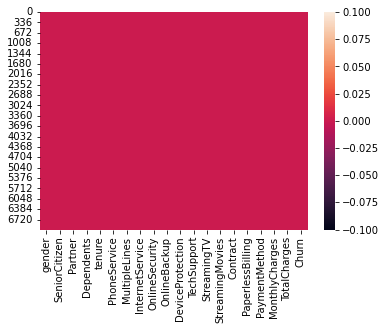

In [20]:
#if i want to visualize the null present or not in given dataset
#it achieve by using heatmap() built in function of seaborn library
sb.heatmap(df.isnull())
plt.show()
#pink color indicate no null present in given dataset

In [21]:
#now checking for duplicate record present or not in given dataset
#it achieve by using duplicated() built in method of pandas library
df.duplicated().sum()

22

In [22]:
#from above result we can conclude that there are 22 records are showing duplicated
#so we have to remove those duplicate value by using
#drop_duplicates() built in function of pandas library
#and removed it permanently by using inplace
df.drop_duplicates(inplace=True)

In [23]:
#checking again duplicated record are removed or not
df.duplicated().sum()

0

In [24]:
#from above given datatset the churns column is a target variable
#and remaining all are input variable/independent variable
#and dtypes of churns column is discrete/object/categorical datatype column value

In [25]:
#checking churns column how many unique value are present in it
df_new['Churn'].unique()

#below result we can conclude that output vaiable are binary classifier

array([0, 1])

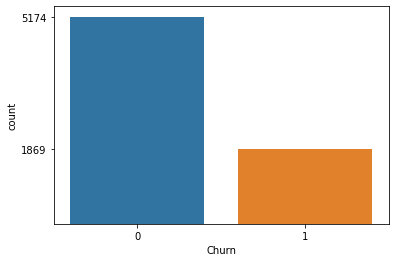

In [26]:
#if i want to visualize the binary classifier of churn column
#it achieve by using countplot() graph of seaborn library
#it as frequency graph
sb.countplot(data=df_new,x='Churn')
f=df_new['Churn'].value_counts()
plt.yticks(f)
plt.show()

#below result we can conclude that
#0===>is not churn 
#1===>is churn
#the quantity of binary classifier in churn column is unbalanced
#so we have to make the minority quantity to be balanced
#it achieve by using imblearn library

In [27]:
#as we know that churn column in given dataset datatype is discrete/categorical/object
#so we r using classification ML algorithm to feed the given dataset

#selecting input and output variable
x=df_new.drop('Churn',axis=1)  #input variable must be in 2d array
y=df_new['Churn']              #output variable must be in 1d array

In [28]:
#preparing the model
#by dividing the datset into 70:30 ratio
#where 70%data we used for training the model
#and 30% data we used for testing the model
#it achiev by using train_test_split class of sklearn.model_selection class

#calling the class
from sklearn.model_selection import train_test_split
#creating an object of train_test_split class
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4930, 19) (4930,)
(2113, 19) (2113,)


In [30]:
#as we know that output variable churn column binary classifier are unbalanced
#we have to make it balanced 
#it achieve by using randomoversampler class of imblearn library

#calling the class of randomoversampling
from imblearn.over_sampling import RandomOverSampler

#creating an object of RandomOverSampler class
ros=RandomOverSampler(random_state=1)

#making binary classifier to be balanced 
#it achieve by using fit_resample() built in method of RandomOverSampler class
x_train,y_train=ros.fit_resample(x_train,y_train)
x_test,y_test=ros.fit_resample(x_test,y_test)

In [31]:
#checking shape again
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7178, 19) (7178,)
(3170, 19) (3170,)


In [32]:
#before feeding the dataset to the logistic regression class
#first we have to do scaling....we apply scaling only on input variable 
#it achieve by using standardscaler class of sklearn library
#calling the class
from sklearn.preprocessing import StandardScaler
#creating an object of StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [33]:
#creating a user defined function for training the model and testing the model 
#and getting classification report through it
#only by passing as object of class as argument to it
def function(model):
    #training the model by 70% of data
    model.fit(x_train,y_train)
    #testing the model by 30% of data
    y_predict=model.predict(x_test)
    #evaluating the model/finding the accuracy of model
    #it achieve by using classificatio_report class and confusion_matrix class
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_predict))
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test,y_predict))
    return model


In [34]:
#now preparing the model 
#by calling the logisticregression class of sklearn.linear_model library
from sklearn.linear_model import LogisticRegression

#creating the object of LogisticRegression class
lr=LogisticRegression()

In [35]:
#now getting training the model and testing the model as well as classification report
#it achieve by calling the function and passing the LogisticRegression class argument to it
lr=function(lr)
lr

#below result we can conclude that
#in precision score or false negative
#acutally output is a churn but machine predicted is not churn
#1==>means churn
#0==>not churn
#the accuracy of model/recall score can be improve 
#bcoz we have not selected the importances features yet

              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1585
           1       0.75      0.82      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1162  423]
 [ 284 1301]]


LogisticRegression()

# now doing feature seelction and finding out which input variable is important to find output variable

In [36]:
#it achieve by using the second algorithm of classification known as decisiontreeclassifier ML algo
#it return each input variable information gain to its decisiontreeclassifier object
#the limitation of decisiontreeclassifier is it return every minute value if ig to its object
#so it take participate to formation of tree bcoz of that...the model become overfit 
#and reqd time for formation of tree will increase
#in order to avoid overfitting we have to use pruning technique

In [37]:
#now preparing the model 
#by calling the class of decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier

#creating an object of DecisionTreeClassifier class
#by default it use gini index method to find information gain of each input column
#formula of gini index=1-p(yes)^2-q(no)^2
dt=DecisionTreeClassifier(random_state=1)


In [38]:
#now getting training the model and testing the model as well as classification report
#it achieve by calling the function and passing the DecisionTreeClassifier class as object
#argument to it
dt=function(dt)
dt

#from below result we can conclude that the recall score
#by DecisionTreeClassifier algo
#0 accuracy increase from 73% to 83%
#but 1 accuracy decrease from 82% to 50%
#it happen bcoz of overfitting of model
#in order to avoid overfitting we have to use pruning technique

              precision    recall  f1-score   support

           0       0.64      0.81      0.71      1585
           1       0.74      0.53      0.62      1585

    accuracy                           0.67      3170
   macro avg       0.69      0.67      0.67      3170
weighted avg       0.69      0.67      0.67      3170

[[1288  297]
 [ 740  845]]


DecisionTreeClassifier(random_state=1)

In [39]:
#if i want to see the information gain value of each input variable
#it achieve by using feature_importances_ attribute of DecisionTreeClassifier class
dt.feature_importances_.round(2)

array([0.02, 0.11, 0.21, 0.18, 0.02, 0.02, 0.02, 0.  , 0.01, 0.01, 0.04,
       0.02, 0.01, 0.01, 0.01, 0.01, 0.23, 0.02, 0.04])

In [40]:
#the ig value if i want to compare with input variable
#it can achieve by using df object of pandas library
dict={'feature':x.columns,'ig':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,Contract,0.229891
1,MonthlyCharges,0.209369
2,TotalCharges,0.179011
3,tenure,0.111326
4,OnlineSecurity,0.043394
5,PaymentMethod,0.043262
6,gender,0.021186
7,SeniorCitizen,0.021176
8,PaperlessBilling,0.020682
9,OnlineBackup,0.019066


In [41]:
'''#creating tree
feature=x.columns
from sklearn import tree
#creating an object of tree class
plt.figure(figsize=(16,9))
_=tree.plot_tree(dt,feature_names=feature,filled=True)
plt.show()'''

'#creating tree\nfeature=x.columns\nfrom sklearn import tree\n#creating an object of tree class\nplt.figure(figsize=(16,9))\n_=tree.plot_tree(dt,feature_names=feature,filled=True)\nplt.show()'

# now applying pruning technique to avoid overfitting model

In [42]:
#in tree mei the most importance comes at top and less important features comes at bottom of tree
#according to information gain value
#so using pruning technique max_depth<=8 we gonna cut the bottom branch of tree who is less important 
#feature to find output variable
#to avoid overfitting the model
#it achieve by 2 method
#max_depth<=8 or not more than that we pass as ahyperparameter to the DecisionTreeClassifier object
#to avoid overfitting model 
#and min_sample_leaf(child node means no parents) should be >=45 and <=100
#we pass as a hyperparameter to the DecisionTreeClassifier object
#to avoid overfitting model

In [43]:
#applying pruning technique method 1)max_depth<=8 to avoid overfitting model
#its make information gain value to be zero for those feature is not important to find target


In [44]:
#preparing the model
#by calling the class of decisiontreeclassifier class and creating the object of it


In [45]:
#creating an object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(max_depth=5,random_state=1)
#by default it take gini method to find information value of each input features

In [46]:
#now getting training the model and testing the model as well as classification report
#it achieve by calling the function and passing the DecisionTreeClassifier class as object
#argument to it
dt1=function(dt1)
dt1

#using hit and trial method to find out at what depth we got recall accuracy 0&1 more
'''for i in range(8,0,-1):
    #creating an object of DecisionTreeClassifier class
    dt1=DecisionTreeClassifier(max_depth=i,random_state=1)
    print('no of depth is ',i)
    dt1=function(dt1)
    dt1
    print()'''
#from below result we can conclude that at a depth of 5 we gonna cut the branch of tree 
#who is less important to find traget

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1585
           1       0.74      0.79      0.76      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

[[1138  447]
 [ 340 1245]]


"for i in range(8,0,-1):\n    #creating an object of DecisionTreeClassifier class\n    dt1=DecisionTreeClassifier(max_depth=i,random_state=1)\n    print('no of depth is ',i)\n    dt1=function(dt1)\n    dt1\n    print()"

In [47]:
#checking the information gain value which is present in DecisionTreeClassifier class object
#and it achieve by using feature_importances_ attribute of DecisionTreeClassifier class
dt1.feature_importances_.round(2)

array([0.01, 0.08, 0.09, 0.04, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.11,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.6 , 0.  , 0.01])

In [48]:
#the ig value if i want to compare with input variable
#it can achieve by using df object of pandas library
dict={'feature':x.columns,'ig':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,Contract,0.600652
1,OnlineSecurity,0.113601
2,MonthlyCharges,0.094101
3,tenure,0.076845
4,TotalCharges,0.044146
5,OnlineBackup,0.021206
6,InternetService,0.013848
7,PaymentMethod,0.011843
8,SeniorCitizen,0.008620
9,gender,0.005505


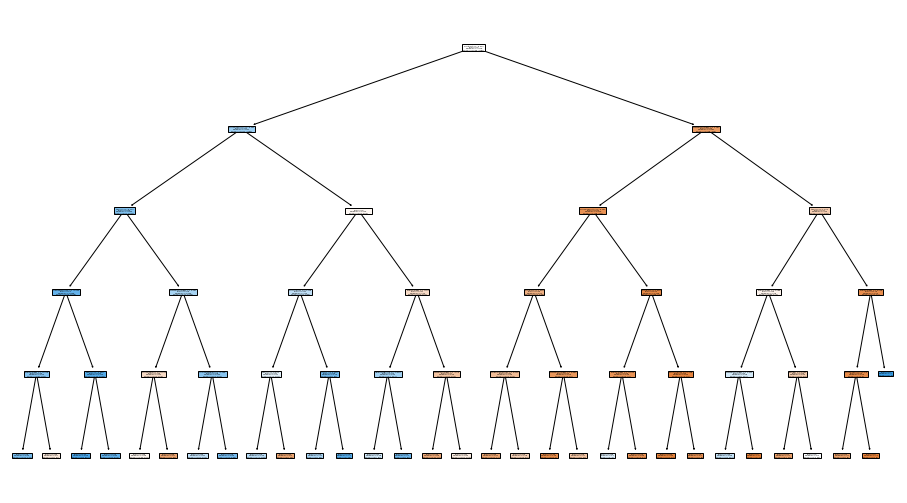

In [49]:
#creating a tree
from sklearn import tree
feature=x.columns
plt.figure(figsize=(16,9))
_=tree.plot_tree(dt1,feature_names=feature,filled=True)
plt.show()

In [50]:
#now applying 2)pruning technique to avoid overfitting model
#min_samples_leaf we pass a parameter to the DecisionTreeClassifier class of object
#the following condn has to satisfy
#leaf (means leaf node who has no child in it should be more than 45 and less than 100)>=45 and <=100

In [51]:
#its a hit and trial method to findout min_samples_leaf at which value 
#recall score of 0&1 is coming out to be more
'''for i in range(45,101,1):
    #preparing the model
    dt2=DecisionTreeClassifier(min_samples_leaf=i,random_state=1)
    print('min_samples_leaf:',i)
    #calling the function
    dt2=function(dt2)
    dt2
    print()'''
    
#below result we can conclude that at value of 47 of min_samples_leaf we getting accuracy of recall
#score good

"for i in range(45,101,1):\n    #preparing the model\n    dt2=DecisionTreeClassifier(min_samples_leaf=i,random_state=1)\n    print('min_samples_leaf:',i)\n    #calling the function\n    dt2=function(dt2)\n    dt2\n    print()"

In [52]:
#preparing model
dt2=DecisionTreeClassifier(min_samples_leaf=47,random_state=1)
#by default it take gini index method to give innformation gain value of each input feature
#and it return to its DecisionTreeClassifier class of object


In [53]:
#now getting training the model and testing the model as well as classification report
#it achieve by calling the function and passing the DecisionTreeClassifier class as object
#argument to it
dt2=function(dt2)
dt2

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1585
           1       0.75      0.78      0.76      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

[[1167  418]
 [ 353 1232]]


DecisionTreeClassifier(min_samples_leaf=47, random_state=1)

In [54]:
#the ig value if i want to compare with input variable
#it can achieve by using df object of pandas library
dict={'feature':x.columns,'ig':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,Contract,0.600652
1,OnlineSecurity,0.113601
2,MonthlyCharges,0.094101
3,tenure,0.076845
4,TotalCharges,0.044146
5,OnlineBackup,0.021206
6,InternetService,0.013848
7,PaymentMethod,0.011843
8,SeniorCitizen,0.008620
9,gender,0.005505


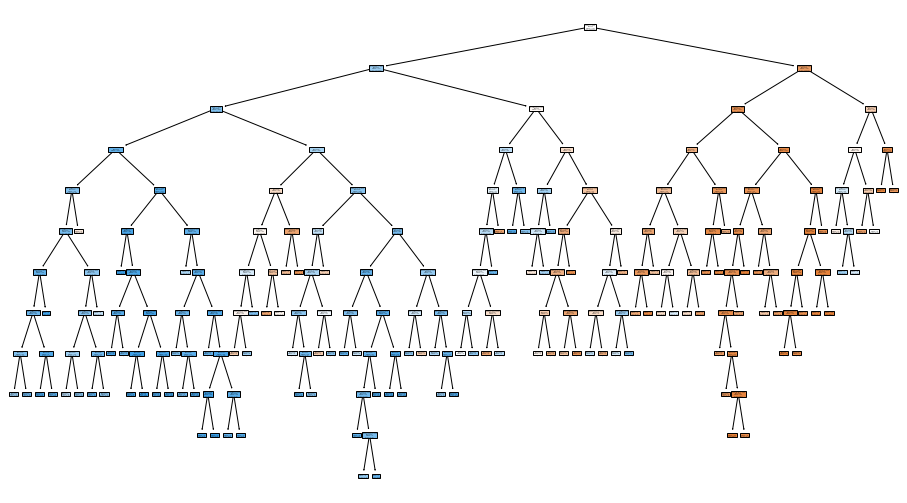

In [55]:
#creating a tree
from sklearn import tree
feature=x.columns
plt.figure(figsize=(16,9))
_=tree.plot_tree(dt2,feature_names=feature,filled=True)
plt.show()

# now applying entrophy method for feature selection
by using DecisionTreeClassifier algorithm 

In [56]:
#preparing the model
#by calling the the class of decisiontreeclassifier
#it return information gain value for each input variable
from sklearn.tree import DecisionTreeClassifier
#creating an object of DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1,criterion='entropy')

In [57]:
#now training the model and testing the model and getting classification report
#by calling the function and passing the parameter to the decisiontreeclassifier class object
dt=function(dt)
dt

              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1585
           1       0.73      0.53      0.61      1585

    accuracy                           0.67      3170
   macro avg       0.68      0.67      0.66      3170
weighted avg       0.68      0.67      0.66      3170

[[1281  304]
 [ 748  837]]


DecisionTreeClassifier(criterion='entropy', random_state=1)

In [58]:
feature=x.columns

In [59]:
#checking information gain value for each column
dt.feature_importances_

array([0.02178935, 0.10773334, 0.21145075, 0.2011771 , 0.02373434,
       0.01866075, 0.01677146, 0.00055042, 0.02025273, 0.0058609 ,
       0.03504702, 0.01747563, 0.01719361, 0.01965865, 0.01166991,
       0.01217385, 0.18729768, 0.02264013, 0.04886236])

In [60]:
#the ig value if i want to compare with input variable
#it can achieve by using df object of pandas library
dict={'feature':x.columns,'ig':dt.feature_importances_}
df_entro=pd.DataFrame(dict)
df_entro.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,MonthlyCharges,0.211451
1,TotalCharges,0.201177
2,Contract,0.187298
3,tenure,0.107733
4,PaymentMethod,0.048862
5,OnlineSecurity,0.035047
6,gender,0.023734
7,PaperlessBilling,0.022640
8,SeniorCitizen,0.021789
9,MultipleLines,0.020253


In [61]:
'''#creating tree
from sklearn import tree
plt.figure(figsize=(16,9))
_=tree.plot_tree(dt,feature_names=x.columns,filled=True)'''

'#creating tree\nfrom sklearn import tree\nplt.figure(figsize=(16,9))\n_=tree.plot_tree(dt,feature_names=x.columns,filled=True)'

In [62]:

#the below result we can conclude that the recall accuracy 0&1 coming very less
#it happen bcoz of overfitting model
#bcoz DecisionTreeClassifier return every feature information gain value
#and they take participate to form atree...bcoz of that model get overfitted
#to overcome the overfitting of model we have to use pruning technique to avoid overfitting
#in which we pass as criterion='entropy' to it
#the formula of entropy is 
#-p(yes)*log2(p)-q(no)*log2(q(no))
#it return every feature information gain value

# to avoid overfitting model we used pruning technique in which we pass criterion='entropy'

In [63]:
#1)method we used in pruning technique is max_depth<=8 passing as parameter to the 
#DecisionTreeClassifier class object 

In [64]:
#using hit and trial method to achieve at what depth we get best recall accuracy of 0&1
'''for i in range(8,0,-1):
    #creating an object of DecisionTreeClassifier class
    dt1=DecisionTreeClassifier(max_depth=i,random_state=1,criterion='entropy')
    print('no of depth is ',i)
    dt1=function(dt1)
    dt1'''

"for i in range(8,0,-1):\n    #creating an object of DecisionTreeClassifier class\n    dt1=DecisionTreeClassifier(max_depth=i,random_state=1,criterion='entropy')\n    print('no of depth is ',i)\n    dt1=function(dt1)\n    dt1"

In [65]:
#preparing the model
#by calling class
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=5)

In [66]:
#calling the function
dt1=function(dt1)
dt1

#recall score of both entropy and gini index to avoid ovefitting model
#is coming to be same

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1585
           1       0.74      0.77      0.76      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

[[1154  431]
 [ 359 1226]]


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [67]:
#using the 2 method of pruning technique to avoid overfitting model is min_samples_leaf
'''for i in range(45,101,1):
    #preparing the model
    dt2=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    print('min sample leaf',i)
    #calling function
    dt2=function(dt2)
    dt2
    print()'''

"for i in range(45,101,1):\n    #preparing the model\n    dt2=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)\n    print('min sample leaf',i)\n    #calling function\n    dt2=function(dt2)\n    dt2\n    print()"

In [68]:
#prpearing the model
dt2=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=60)
#calling the function
dt2=function(dt2)
dt2

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1585
           1       0.75      0.78      0.76      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

[[1176  409]
 [ 350 1235]]


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=60, random_state=1)

In [69]:
#checking information gain value 
#the ig value if i want to compare with input variable
#it can achieve by using df object of pandas library
dict={'feature':x.columns,'ig':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,Contract,0.577781
1,MonthlyCharges,0.116577
2,OnlineSecurity,0.108381
3,tenure,0.081344
4,TotalCharges,0.061627
5,SeniorCitizen,0.016713
6,InternetService,0.011966
7,OnlineBackup,0.011831
8,PaymentMethod,0.003881
9,gender,0.003834


# now applying ensemble technique to find the accuracy of model means recall accuracy
1)it achieve by using randomforesttree classifier of sklearn.ensemble library
2)in randomforestclassifier we give 70% training data and see it takes how many decisiontreeclassifier
3)in machine learning by default minimum we can create dt=10...goes upto maximum<=100
4)randomforestclassifier algo is working on bagging mechanism of bootstamping

In [70]:
#preparing the model
#by calling the randomforestclassifeier class of sklearn library
from sklearn.ensemble import RandomForestClassifier
#by default it working on gini index method and return information gain value to each input variable

#inside the parenthesis of RandomForestClassifier class we have to pass max_features
#lets check how many feature present in input variable
#it achieve by using shape attribute of numpy library
x.shape
#in given dataset total 19 features it have

(7043, 19)

In [71]:
#so we r using hit and trial method
#to see at less feature mei recall score accuracy kis decisiontreeclassifier ki aachi aarhi hai
#jitna less feature hoga utna kum time lagegha formation tree mei
'''for i in range(19,0,-1):
    #preparing the model
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print('feature',i)
    #calling the function
    rfc=function(rfc)
    rfc
    print()'''
#so below result we can conclude that at feature 1 the accuracy of recall is coming good compare 
#to others features

"for i in range(19,0,-1):\n    #preparing the model\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)\n    print('feature',i)\n    #calling the function\n    rfc=function(rfc)\n    rfc\n    print()"

In [72]:
#prpearing the model
rfc=RandomForestClassifier(n_estimators=10,max_features=1,random_state=1)

In [73]:
#calling the function
rfc=function(rfc)
rfc

              precision    recall  f1-score   support

           0       0.64      0.86      0.73      1585
           1       0.78      0.52      0.62      1585

    accuracy                           0.69      3170
   macro avg       0.71      0.69      0.68      3170
weighted avg       0.71      0.69      0.68      3170

[[1360  225]
 [ 768  817]]


RandomForestClassifier(max_features=1, n_estimators=10, random_state=1)

In [74]:
#checking information gain value on rfc object
rfc.feature_importances_.round(2)

array([0.02, 0.16, 0.16, 0.16, 0.02, 0.02, 0.02, 0.01, 0.02, 0.03, 0.05,
       0.03, 0.04, 0.05, 0.02, 0.02, 0.07, 0.03, 0.07])

In [75]:
#the ig value if i want to compare with input variable
#it can achieve by using df object of pandas library
dict={'feature':x.columns,'ig':rfc.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,TotalCharges,0.163328
1,MonthlyCharges,0.161203
2,tenure,0.157970
3,PaymentMethod,0.070273
4,Contract,0.069775
5,OnlineSecurity,0.052241
6,TechSupport,0.050008
7,DeviceProtection,0.036724
8,OnlineBackup,0.030532
9,PaperlessBilling,0.030250


# using entropy method in randomforestclassifier class

In [76]:
#so we r using hit and trial method
#to see at less feature mei recall score accuracy kis decisiontreeclassifier ki aachi aarhi hai
#jitna less feature hoga utna kum time lagegha formation tree mei
'''for i in range(19,0,-1):
    #preparing the model
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion='entropy')
    print('feature',i)
    #calling the function
    rfc=function(rfc)
    rfc
    print()'''
#at feature 4 it showing accuracy good compare to gini index method of randomforestclassifier
#the accuracy is coming out to be lesss bcoz of overfitting the model
#in order to avoid overfitting pblm we have to use pruning technique
#parameter of pruning technique we can pass inside the randomforest tree classifier

"for i in range(19,0,-1):\n    #preparing the model\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion='entropy')\n    print('feature',i)\n    #calling the function\n    rfc=function(rfc)\n    rfc\n    print()"

In [77]:
#prpearing the model
rfc=RandomForestClassifier(n_estimators=10,max_features=4,random_state=1)

In [78]:
#calling the function
rfc=function(rfc)
rfc

              precision    recall  f1-score   support

           0       0.65      0.85      0.74      1585
           1       0.79      0.55      0.65      1585

    accuracy                           0.70      3170
   macro avg       0.72      0.70      0.69      3170
weighted avg       0.72      0.70      0.69      3170

[[1355  230]
 [ 720  865]]


RandomForestClassifier(max_features=4, n_estimators=10, random_state=1)

# now using boosting technique which is a subset of ensemble technique

In [79]:
#ada boosting(adaptor boosting)
#gradient boosting
#extreme gradient boosting

#now using adabooster classifier algorithm is part of (adaptor) boosting technique which is also subset of ensemble technique
ada boostng is working on mechanism of decision stump(means 1 root node and 2 leaf node means no child in it)

In [80]:
#preparing the model 
#by calling the class of AdaBoostClassifier class of sklearn library
from sklearn.ensemble import AdaBoostClassifier

#in  AdaBoostClassifier class of sklearn library
#n_estimator means how many decision stump to be create 
#by default it should be<=100
#so using hit and trial issliye use kr rhe hai ki konse features pe recall accuracy high aa rhi hai
'''for i in range(16,0,-1):
    #preparing the model
    abc=AdaBoostClassifier(n_estimators=i,random_state=1)
    print('no of decision stump',i)
    #now trainging and testing and finding classification report by calling function
    abc=function(abc)
    abc
    print()'''
#below result we can conclude that
#at decision stump 3 means (at the 3 features we getting recall acuracy more of 0&1)
#we r getting accuracy 0&1 recall accuracy good

"for i in range(16,0,-1):\n    #preparing the model\n    abc=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print('no of decision stump',i)\n    #now trainging and testing and finding classification report by calling function\n    abc=function(abc)\n    abc\n    print()"

In [81]:
#prpearing the model
#calling and class and creating an object of class
abc=AdaBoostClassifier(n_estimators=3,random_state=1)

In [82]:
#now trainging the model and testing the model  and getting classification report by calling function
abc=function(abc)
abc

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1585
           1       0.74      0.80      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

[[1144  441]
 [ 314 1271]]


AdaBoostClassifier(n_estimators=3, random_state=1)

# gradientboosting algorithm is part of boosting techique which is also subpart of ensemble technique

In [83]:
#gradientboostingclassifier class is (GB)  its create a fully grown tree(decisiontree).
#this algorithm is focus on short comings 
#short comings means error
# means residual =actual output-predicted output

In [84]:
#preparing the model
#by calling the class
from sklearn.ensemble import GradientBoostingClassifier
#in GradientBoostingClassifier class object when we pass a parameter n_estimators means
#70%training data will crate how many decisiontree
#by default minimum=dt=10 and max<=100
#so we r using hit and trial method
#to see at how many decision tree the recall accuracy coming out be good
'''for i in range(10,101):
    #prpearing the model
    #creating an object of GradientBoostingClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('no of estimator: ',i)
    # #now trainging and testing and finding classification report by calling function
    gbc=function(gbc)
    gbc
    print()'''
#below result we can conclude that
#at n_estimators=16 getting recall accuracy good
    

"for i in range(10,101):\n    #prpearing the model\n    #creating an object of GradientBoostingClassifier class\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print('no of estimator: ',i)\n    # #now trainging and testing and finding classification report by calling function\n    gbc=function(gbc)\n    gbc\n    print()"

In [85]:
#creating object of Gradientboostingclassifier class
gbc=GradientBoostingClassifier(n_estimators=16,random_state=1)

In [86]:
#calling the function
gbc=function(gbc)
gbc

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1585
           1       0.74      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

[[1136  449]
 [ 283 1302]]


GradientBoostingClassifier(n_estimators=16, random_state=1)

# extreme gradient boosting algo is part of boosting technique


In [87]:
#prpearing the model by calling the class
from xgboost import XGBClassifier

In [88]:
#IN XGBClassifier class object we pass parameter n_estimators means
#70%training data will crate how many decisiontree
#by default minimum=dt=10 and max<=100
#so we r using hit and trial method
#to see at how many decision tree the recall accuracy coming out be good
'''for i in range(10,101,1):
    #prparing the model
    #creating the object of XGBClassifier class
    #automatic overfitting: reg means regularization and alpha or lambda:
    #hyperparameter
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print('no of estimator',i)
    #calling functon
    xgc=function(xgc)
    xgc
    print()'''
#below result we can conclude that at n_estimators=10
#we a r getting recall accuracy 0&1 to be good

"for i in range(10,101,1):\n    #prparing the model\n    #creating the object of XGBClassifier class\n    #automatic overfitting: reg means regularization and alpha or lambda:\n    #hyperparameter\n    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)\n    print('no of estimator',i)\n    #calling functon\n    xgc=function(xgc)\n    xgc\n    print()"

In [89]:
#CREATING AN object of class XGBClassifier
xgc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)

In [90]:
#calling function
xgc=function(xgc)
xgc

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1585
           1       0.76      0.80      0.78      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1189  396]
 [ 316 1269]]


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=1, reg_lambda=1, ...)